Daniel Brai Gonzales Marcos             CP3013375

Giovanna Nascimento Antonieti           CP3013383

In [1]:
!pip3 install matplotlib numpy scikit-learn pandas

You should consider upgrading via the 'G:\Documents\especializacao\env_analise\Scripts\python.exe -m pip install --upgrade pip' command.


In [31]:
import os
import urllib.request
import numpy as np

def download(url):
    filename = url.split("/")[-1]
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url, filename)

# CIFAR-10

download('https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz')

In [3]:
import tarfile
  
# open file
file = tarfile.open('cifar-10-python.tar.gz')
  
# extracting file
file.extractall('./images')
  
file.close()

In [115]:
import pickle

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [8]:
batch1 = unpickle('./images/cifar-10-batches-py/data_batch_1')
batch2 = unpickle('./images/cifar-10-batches-py/data_batch_2')
batch3 = unpickle('./images/cifar-10-batches-py/data_batch_3')
batch4 = unpickle('./images/cifar-10-batches-py/data_batch_4')
batch5 = unpickle('./images/cifar-10-batches-py/data_batch_5')
batches = unpickle('./images/cifar-10-batches-py/batches.meta')
test = unpickle('./images/cifar-10-batches-py/test_batch')

In [67]:
images = [*batch1.get(b'data') ,* batch2.get(b'data'), * batch3.get(b'data'), * batch4.get(b'data'),* batch5.get(b'data')]
images[0]

array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)

In [69]:
labels = [*batch1.get(b'labels') ,* batch2.get(b'labels'), * batch3.get(b'labels'), * batch4.get(b'labels'),* batch5.get(b'labels')]
labels

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [70]:
label_names = batches.get(b'label_names')
label_names

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [39]:
! pip3 install pillow
import matplotlib.pyplot as plt
from PIL import Image

You should consider upgrading via the 'G:\Documents\especializacao\env_analise\Scripts\python.exe -m pip install --upgrade pip' command.


In [131]:
X = np.array(images).reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

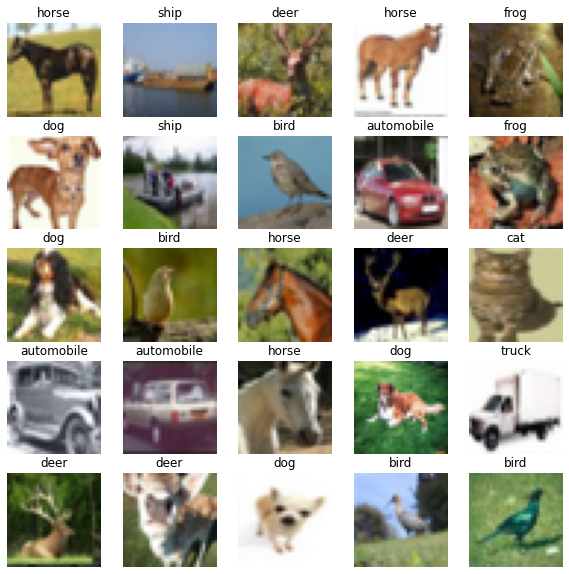

In [122]:
fig, axes1 = plt.subplots(5,5,figsize=(10,10))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].title.set_text(str(label_names[labels[i]]).replace("b'"," ").replace("'"," ").strip())
        axes1[j][k].imshow(X[i:i+1][0])

In [123]:
import seaborn as sns

<AxesSubplot:ylabel='count'>

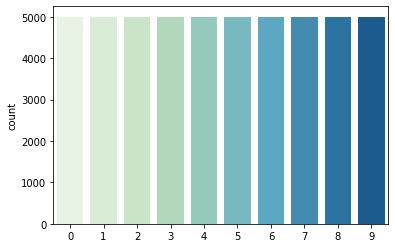

In [125]:
sns.countplot(x=labels, palette='GnBu')

In [132]:
nsamples, nx, ny,_ = X.shape
X= [rgb2gray(i) for i in X]
X = np.reshape(X,(nsamples,nx*ny))

In [133]:
X_train, X_validation, y_train, y_validation = train_test_split(
...     X, labels, test_size=0.2, random_state=42)

In [134]:
X_train.shape

(40000, 1024)

In [105]:
len(y_train)

40000

In [103]:
X_validation.shape

(10000, 32, 32, 3)

In [107]:
len(y_validation)

10000

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()
params_random=[{'n_estimators':[100,150,200], 'criterion':['gini','entropy'], 'n_jobs':[30]}]

gs_random = GridSearchCV(randomForest, params_random, cv=10, scoring='accuracy')
gs_random.fit(X_train, y_train)

In [ ]:
gs_random.best_score_